<a href="https://colab.research.google.com/github/Oebele/Deep-lerning-for-beginners/blob/master/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoders

In [1]:
%tensorflow_version 2.x


## Encoding layers

In [2]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# dimensionality of input and latent encoded representations
inpt_dim = 8
ltnt_dim = 2  

inpt_vec = Input(shape=(inpt_dim,))
elayer1 = Dense(6,        activation='sigmoid')(inpt_vec)
elayer2 = Dense(4,        activation='sigmoid') (elayer1)
encoder = Dense(ltnt_dim, activation='sigmoid') (elayer2)
# ^ the output here would yield the latent representation

# model that takes input and encodes it into the latent space
latent_ncdr = Model(inpt_vec, encoder)

## Decoding Layers

In [3]:
dlayer1 = Dense(4,        activation='sigmoid')(encoder)
dlayer2 = Dense(6,        activation='sigmoid') (dlayer1)
decoder = Dense(inpt_dim, activation='sigmoid') (dlayer2)
# ^ the output here would yield the reconstructed version

# model that takes input, encodes it, and decodes it
autoencoder = Model(inpt_vec, decoder)

## Loss function

In [4]:
autoencoder.compile(loss='mean_squared_error', optimizer='sgd')


## Learning and testing

In [5]:
import numpy as np

x = np.array([[0., 0., 1., 0., 0., 1., 1., 1.]])

hist = autoencoder.fit(x, x, epochs=10000, verbose=0)

encdd = latent_ncdr.predict(x)
x_hat = autoencoder.predict(x)

print(encdd)
print(x_hat)
print(np.mean(np.square(x-x_hat)))

[[0.31744233 0.63295704]]
[[0.08563939 0.09089354 0.91440165 0.08195308 0.07913926 0.92075074
  0.9216769  0.9192277 ]]
0.006855158264135408


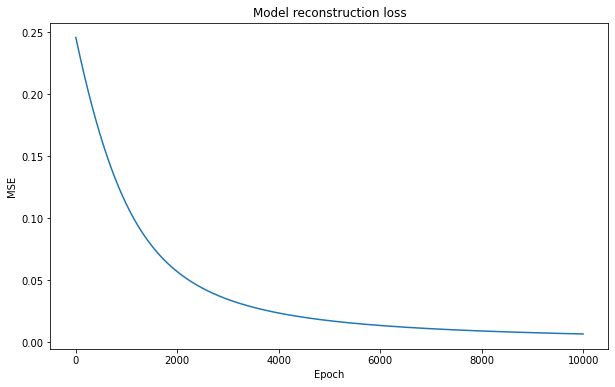

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'])
plt.title('Model reconstruction loss')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.savefig('ch.7.ae.toy.loss.png', dpi=350, bbox_inches='tight')
plt.show()

In [7]:
x = np.array([[1., 1., 0., 1., 1., 0., 0., 0.]])

encdd = latent_ncdr.predict(x)
x_hat = autoencoder.predict(x)

print(encdd)
print(x_hat)
print(np.mean(np.square(x-x_hat)))

[[0.31534004 0.6460313 ]]
[[0.08566424 0.09093404 0.9143598  0.0819661  0.0791696  0.9206852
  0.9216356  0.91919935]]
0.8413975470864548


# Applications in dimensionality reduction and visualization
## MNIST data preparation

In [27]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

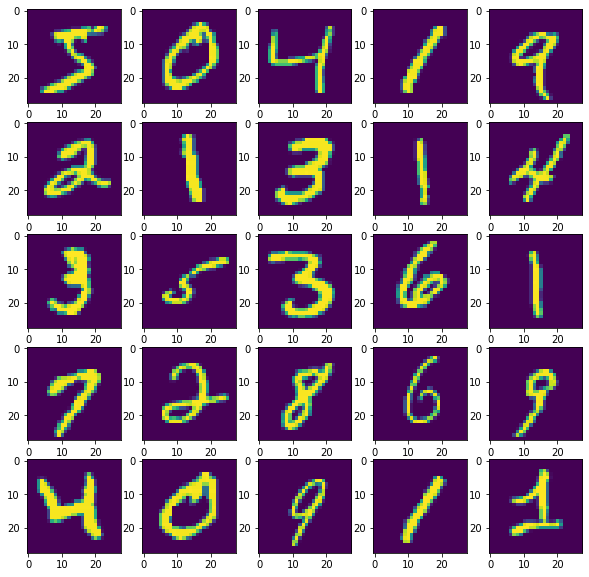

In [28]:
plt.figure(figsize=(10,10)) # specifying the overall grid size

for i in range(25):
    plt.subplot(5,5,i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(x_train[i])

plt.show()

In [29]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


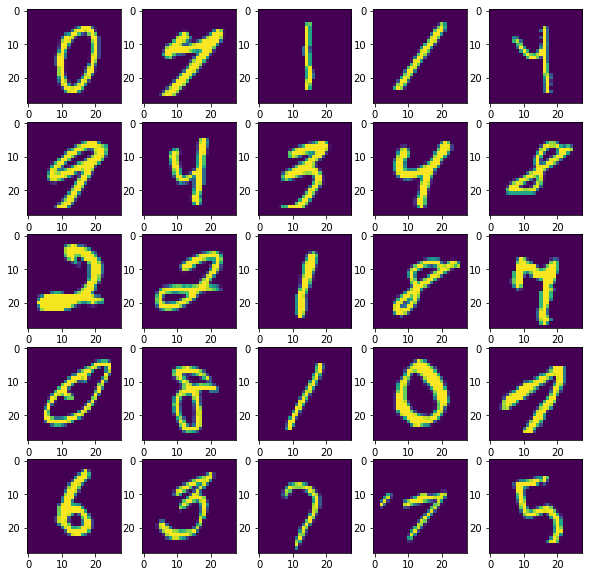

In [31]:
plt.figure(figsize=(10,10)) # specifying the overall grid size

for i in range(1000, 1025):
    plt.subplot(5,5,i+1-1000)    # the number of images in the grid is 5*5 (25)
    plt.imshow(x_train[i])

plt.show()

In [32]:
x_train = x_train.reshape((len(x_train), 28*28))
x_test = x_test.reshape((len(x_test), 28*28))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## Autoencoders for MNIST 

In [33]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# dimensionality of input and latent encoded representations
inpt_dim = 28*28
ltnt_dim = 2  

inpt_vec = Input(shape=(inpt_dim,))
elayer1 = Dense(392,        activation='sigmoid')(inpt_vec)
elayer2 = Dense(28,        activation='sigmoid') (elayer1)
elayer3 = Dense(10,        activation='sigmoid') (elayer2)
encoder = Dense(ltnt_dim, activation='tanh') (elayer3)
# ^ the output here would yield the latent representation

# model that takes input and encodes it into the latent space
latent_ncdr = Model(inpt_vec, encoder)

dlayer1 = Dense(10,        activation='sigmoid')(encoder)
dlayer2 = Dense(28,        activation='sigmoid')(dlayer1)
dlayer3 = Dense(392,        activation='sigmoid')(dlayer2)
decoder = Dense(inpt_dim, activation='sigmoid') (dlayer3)
# ^ the output here would yield the reconstructed version

# model that takes input, encodes it, and decodes it
autoencoder = Model(inpt_vec, decoder)

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

hist = autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, 
                       shuffle=True, validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 7s 29ms/step - loss: 0.2758 - val_loss: 0.2632
Epoch 2/100
235/235 [==============================] - 7s 28ms/step - loss: 0.2622 - val_loss: 0.2590
Epoch 3/100
235/235 [==============================] - 7s 29ms/step - loss: 0.2486 - val_loss: 0.2418
Epoch 4/100
235/235 [==============================] - 7s 28ms/step - loss: 0.2414 - val_loss: 0.2401
Epoch 5/100
235/235 [==============================] - 7s 28ms/step - loss: 0.2396 - val_loss: 0.2378
Epoch 6/100
235/235 [==============================] - 7s 29ms/step - loss: 0.2375 - val_loss: 0.2359
Epoch 7/100
235/235 [==============================] - 7s 29ms/step - loss: 0.2362 - val_loss: 0.2348
Epoch 8/100
235/235 [==============================] - 7s 29ms/step - loss: 0.2352 - val_loss: 0.2339
Epoch 9/100
235/235 [==============================] - 7s 29ms/step - loss: 0.2339 - val_loss: 0.2318
Epoch 10/100
235/235 [==============================] - 7s 29ms/step - loss: 0.227

## Training and visualization

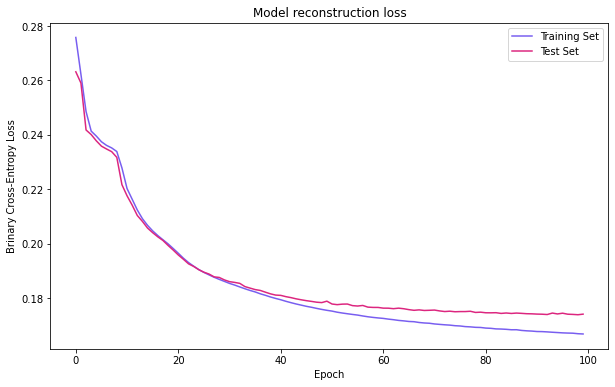

In [34]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], color='#785ef0')
plt.plot(hist.history['val_loss'], color='#dc267f')
plt.title('Model reconstruction loss')
plt.ylabel('Brinary Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Test Set'], loc='upper right')
plt.savefig('ch.7.ae.mnist.loss.png', dpi=350, bbox_inches='tight')
plt.show()

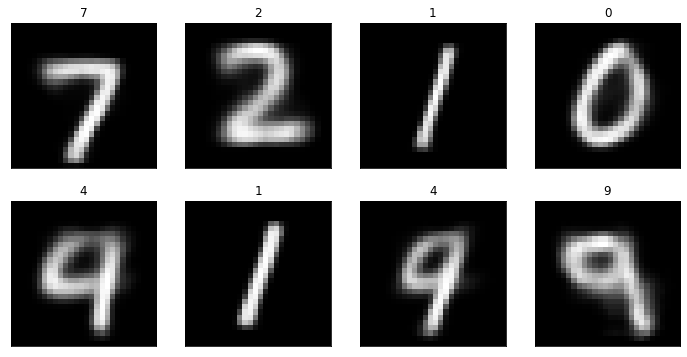

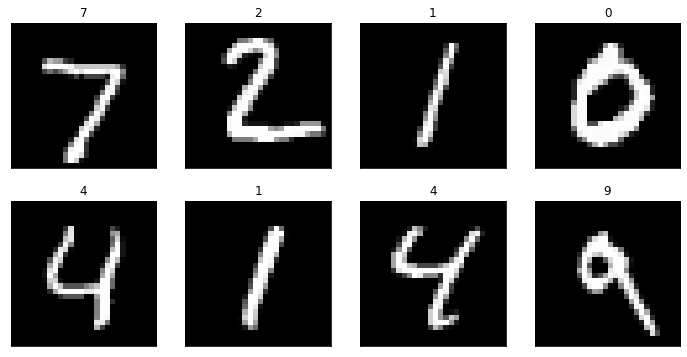

In [35]:
import matplotlib.pyplot as plt
import numpy as np

encdd = latent_ncdr.predict(x_test)
x_hat = autoencoder.predict(x_test)

plt.figure(figsize=(12,6))
for i, (img, y) in enumerate(zip(x_hat[0:8].reshape(8, 28, 28), y_test[0:8])):
  plt.subplot(241 + i)
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(y)
plt.savefig('ch.7.mnist.4l.reconstructed.png', bbox_inches='tight', dpi=350)
plt.show()

plt.figure(figsize=(12,6))
for i, (img, y) in enumerate(zip(x_test[0:8].reshape(8, 28, 28), y_test[0:8])):
  plt.subplot(241 + i)
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(y)
plt.savefig('ch.7.mnist.original.png', bbox_inches='tight', dpi=350)
plt.show()

(10000, 2)


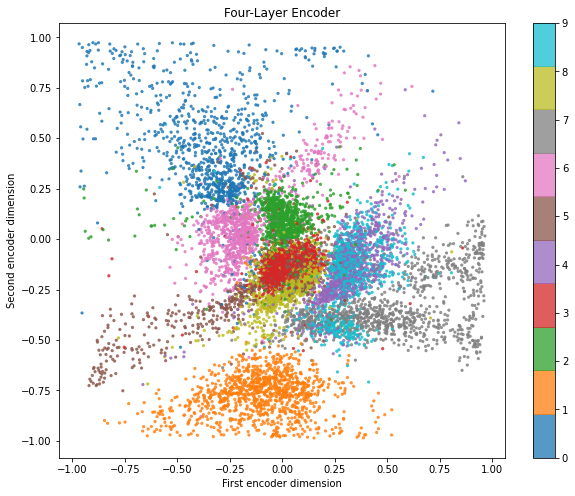

In [37]:
import matplotlib.pyplot as plt

y_ = list(map(int, y_test))
X_ = encdd

print(X_.shape)

plt.figure(figsize=(10,8))
plt.title('Four-Layer Encoder')
plt.scatter(X_[:,0], X_[:,1], s=5.0, c=y_, alpha=0.75, cmap='tab10')
plt.xlabel('First encoder dimension')
plt.ylabel('Second encoder dimension')
plt.colorbar();

In [38]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# dimensionality of input and latent encoded representations
inpt_dim = 28*28
ltnt_dim = 2  

inpt_vec = Input(shape=(inpt_dim,))
elayer1 = Dense(28,        activation='sigmoid')(inpt_vec)
elayer2 = Dense(10,        activation='sigmoid') (elayer1)
encoder = Dense(ltnt_dim, activation='tanh') (elayer2)
# ^ the output here would yield the latent representation

# model that takes input and encodes it into the latent space
latent_ncdr = Model(inpt_vec, encoder)

dlayer1 = Dense(10,        activation='sigmoid')(encoder)
dlayer2 = Dense(28,        activation='sigmoid')(dlayer1)
decoder = Dense(inpt_dim, activation='sigmoid') (dlayer2)
# ^ the output here would yield the reconstructed version

# model that takes input, encodes it, and decodes it
autoencoder = Model(inpt_vec, decoder)

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

hist = autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, 
                       shuffle=True, validation_data=(x_test, x_test))


Epoch 1/100
235/235 [==============================] - 2s 11ms/step - loss: 0.3776 - val_loss: 0.2766
Epoch 2/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2698 - val_loss: 0.2661
Epoch 3/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2652 - val_loss: 0.2642
Epoch 4/100
235/235 [==============================] - 3s 11ms/step - loss: 0.2640 - val_loss: 0.2634
Epoch 5/100
235/235 [==============================] - 3s 11ms/step - loss: 0.2636 - val_loss: 0.2631
Epoch 6/100
235/235 [==============================] - 2s 11ms/step - loss: 0.2633 - val_loss: 0.2629
Epoch 7/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2632 - val_loss: 0.2628
Epoch 8/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2631 - val_loss: 0.2628
Epoch 9/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2629 - val_loss: 0.2618
Epoch 10/100
235/235 [==============================] - 2s 11ms/step - loss: 0.260

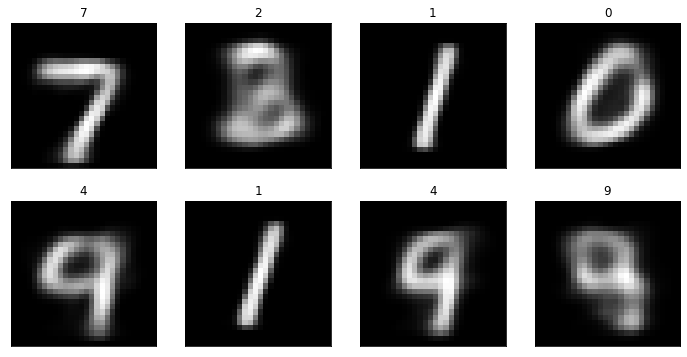

In [39]:
import matplotlib.pyplot as plt
import numpy as np

encdd = latent_ncdr.predict(x_test)
x_hat = autoencoder.predict(x_test)

plt.figure(figsize=(12,6))
for i, (img, y) in enumerate(zip(x_hat[0:8].reshape(8, 28, 28), y_test[0:8])):
  plt.subplot(241 + i)
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(y)
plt.show()

(10000, 2)


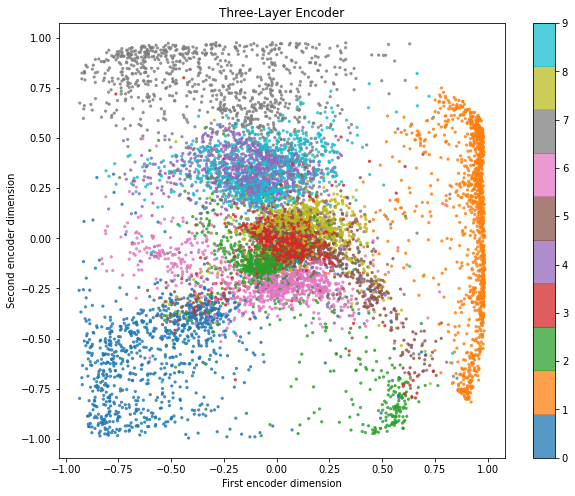

In [40]:
import matplotlib.pyplot as plt

y_ = list(map(int, y_test))
X_ = encdd

print(X_.shape)

plt.figure(figsize=(10,8))
plt.title('Three-Layer Encoder')
plt.scatter(X_[:,0], X_[:,1], s=5.0, c=y_, alpha=0.75, cmap='tab10')
plt.xlabel('First encoder dimension')
plt.ylabel('Second encoder dimension')
plt.colorbar();

In [41]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# dimensionality of input and latent encoded representations
inpt_dim = 28*28
ltnt_dim = 2  

inpt_vec = Input(shape=(inpt_dim,))
elayer1 = Dense(10,        activation='sigmoid')(inpt_vec)
encoder = Dense(ltnt_dim, activation='tanh') (elayer1)
# ^ the output here would yield the latent representation

# model that takes input and encodes it into the latent space
latent_ncdr = Model(inpt_vec, encoder)

dlayer1 = Dense(10,        activation='sigmoid')(encoder)
decoder = Dense(inpt_dim, activation='sigmoid') (dlayer1)
# ^ the output here would yield the reconstructed version

# model that takes input, encodes it, and decodes it
autoencoder = Model(inpt_vec, decoder)

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

hist = autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, 
                       shuffle=True, validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 2s 10ms/step - loss: 0.4915 - val_loss: 0.3554
Epoch 2/100
235/235 [==============================] - 2s 9ms/step - loss: 0.3131 - val_loss: 0.2891
Epoch 3/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2803 - val_loss: 0.2742
Epoch 4/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2714 - val_loss: 0.2690
Epoch 5/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2679 - val_loss: 0.2666
Epoch 6/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2661 - val_loss: 0.2653
Epoch 7/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2651 - val_loss: 0.2645
Epoch 8/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2645 - val_loss: 0.2639
Epoch 9/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2641 - val_loss: 0.2636
Epoch 10/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2638 - val_l

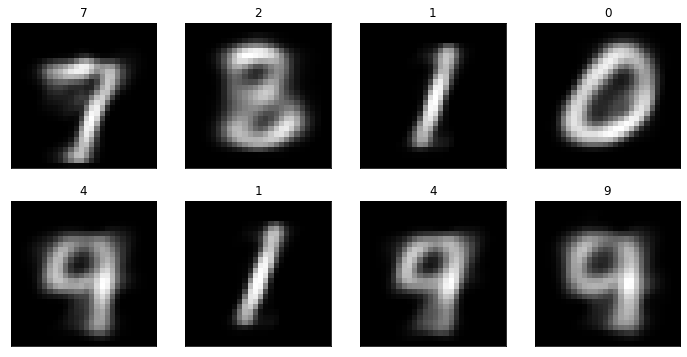

In [42]:
import matplotlib.pyplot as plt
import numpy as np

encdd = latent_ncdr.predict(x_test)
x_hat = autoencoder.predict(x_test)

plt.figure(figsize=(12,6))
for i, (img, y) in enumerate(zip(x_hat[0:8].reshape(8, 28, 28), y_test[0:8])):
  plt.subplot(241 + i)
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(y)
plt.show()


(10000, 2)


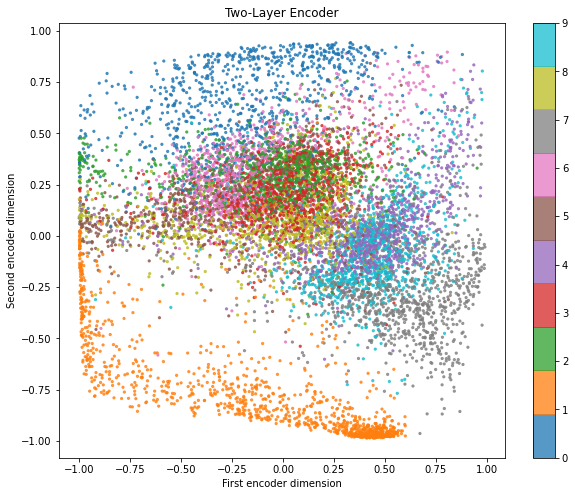

In [43]:
import matplotlib.pyplot as plt

y_ = list(map(int, y_test))
X_ = encdd

print(X_.shape)

plt.figure(figsize=(10,8))
plt.title('Two-Layer Encoder')
plt.scatter(X_[:,0], X_[:,1], s=5.0, c=y_, alpha=0.75, cmap='tab10')
plt.xlabel('First encoder dimension')
plt.ylabel('Second encoder dimension')
plt.colorbar();

In [44]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# dimensionality of input and latent encoded representations
inpt_dim = 28*28
ltnt_dim = 2  

inpt_vec = Input(shape=(inpt_dim,))
encoder = Dense(ltnt_dim, activation='tanh') (inpt_vec)
# ^ the output here would yield the latent representation

# model that takes input and encodes it into the latent space
latent_ncdr = Model(inpt_vec, encoder)

decoder = Dense(inpt_dim, activation='sigmoid') (encoder)
# ^ the output here would yield the reconstructed version

# model that takes input, encodes it, and decodes it
autoencoder = Model(inpt_vec, decoder)

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

hist = autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, 
                       shuffle=True, validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 2s 9ms/step - loss: 0.5840 - val_loss: 0.4977
Epoch 2/100
235/235 [==============================] - 2s 9ms/step - loss: 0.4445 - val_loss: 0.4022
Epoch 3/100
235/235 [==============================] - 2s 9ms/step - loss: 0.3742 - val_loss: 0.3517
Epoch 4/100
235/235 [==============================] - 2s 9ms/step - loss: 0.3359 - val_loss: 0.3230
Epoch 5/100
235/235 [==============================] - 2s 9ms/step - loss: 0.3135 - val_loss: 0.3055
Epoch 6/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2994 - val_loss: 0.2942
Epoch 7/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2902 - val_loss: 0.2866
Epoch 8/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2838 - val_loss: 0.2812
Epoch 9/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2792 - val_loss: 0.2773
Epoch 10/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2759 - val_lo

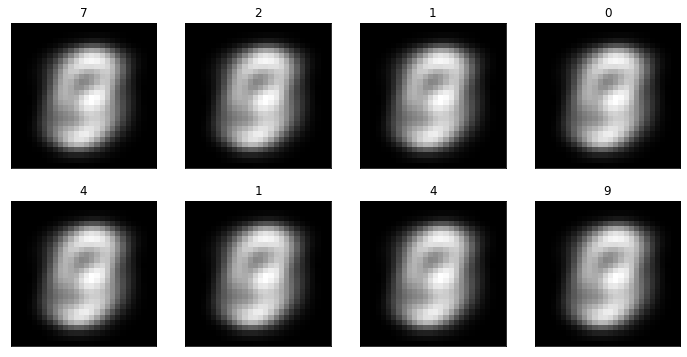

In [45]:
import matplotlib.pyplot as plt
import numpy as np

encdd = latent_ncdr.predict(x_test)
x_hat = autoencoder.predict(x_test)

plt.figure(figsize=(12,6))
for i, (img, y) in enumerate(zip(x_hat[0:8].reshape(8, 28, 28), y_test[0:8])):
  plt.subplot(241 + i)
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(y)
plt.show()

(10000, 2)


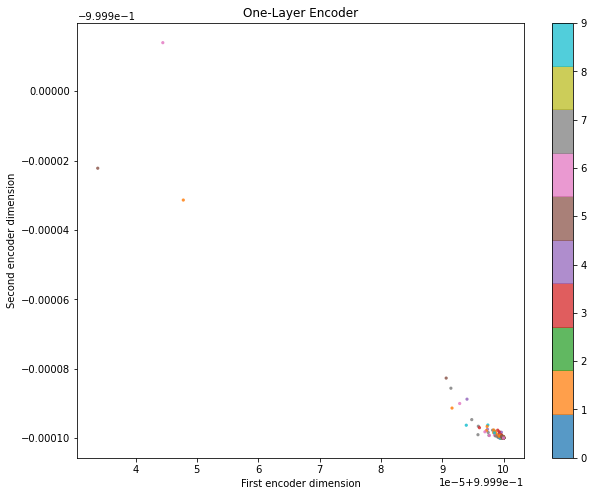

In [46]:
import matplotlib.pyplot as plt

y_ = list(map(int, y_test))

X_ = encdd

print(X_.shape)

plt.figure(figsize=(10,8))
plt.title('One-Layer Encoder')
plt.scatter(X_[:,0], X_[:,1], s=5.0, c=y_, alpha=0.75, cmap='tab10')
plt.xlabel('First encoder dimension')
plt.ylabel('Second encoder dimension')
plt.colorbar()
